The hash function h maps binary vectors of dimension m to binary vectors of dimension n, where m > n, with the help of an n × m matrix H with binary elements that are generated randomly. More specifically, given the matrix H, the hash function h : {0,1}^m → {0,1}^n provides the following hash value for a key x ∈ {0,1}^m :
                                       
**h(x) = Hx mod 2**

where the mod operator is applied element-wise (to the obtained vector Hx).
For instance, if m = 3, n = 2, H is the matrix consisting of all ones, x is the vector of all ones, then the obtained vector Hx will be the vector of all threes, and when the element-wise mod 2 is applied, the two-dimensional vector h(x) will be obtained as the vector of all ones.

Compare the theoretical and empirical collision probabilities


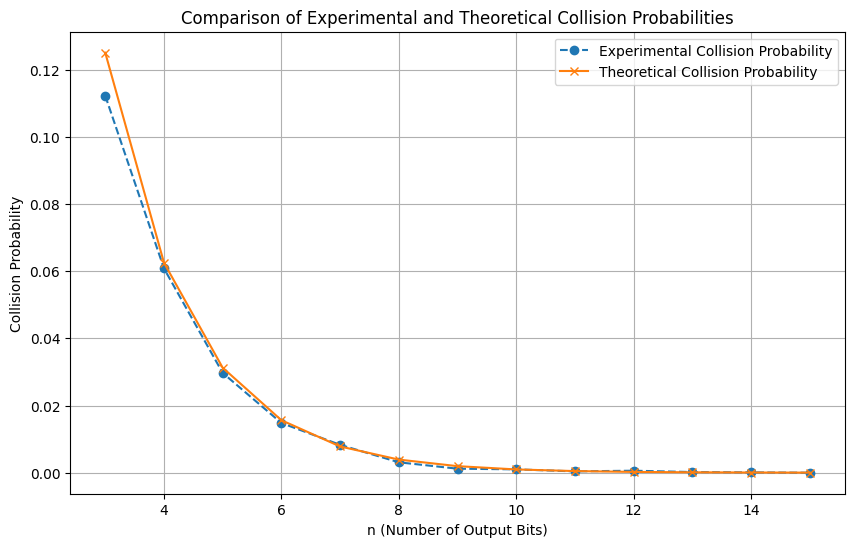

Comparison plot saved as 'comparison_plot.pdf'.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_H(n, m):
    return np.random.randint(0, 2, size=(n, m))

def generate_random_binary_vector(m):
    return np.random.randint(0, 2, size=m)

def calculate_collision_probability(H, N, m):
    collision_count = 0

    for _ in range(N):
        while True:
            x_prime = generate_random_binary_vector(m)
            x_double_prime = generate_random_binary_vector(m)
            if not np.array_equal(x_prime, x_double_prime):
                break

        h_x_prime = np.mod(np.matmul(H, x_prime), 2)
        h_x_double_prime = np.mod(np.matmul(H, x_double_prime), 2)

        if np.array_equal(h_x_prime, h_x_double_prime):
            collision_count += 1

    return collision_count / N

def CompareCollisionProbabilities(outfile_name='comparison_plot.pdf'):
    seed = 1234  
    np.random.seed(seed)

    n_values = np.arange(3, 16)
    empirical_probs = []
    theoretical_probs = []

    for n in n_values:
        m = 2 * n
        H = generate_random_H(n, m)
        N = 10000

        empirical_prob = calculate_collision_probability(H, N, m)
        empirical_probs.append(empirical_prob)

        theoretical_prob = 1 / (2 ** n)
        theoretical_probs.append(theoretical_prob)
        
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, empirical_probs, label='Experimental Collision Probability', marker='o', linestyle='--')
    plt.plot(n_values, theoretical_probs, label='Theoretical Collision Probability', marker='x', linestyle='-')
    plt.xlabel('n (Number of Output Bits)')
    plt.ylabel('Collision Probability')
    plt.title('Comparison of Experimental and Theoretical Collision Probabilities')
    plt.legend()
    plt.grid(True)
    #plt.savefig(outfile_name)
    plt.show()

def main():

    CompareCollisionProbabilities(outfile_name='comparison_plot.pdf')
    print("Comparison plot saved as 'comparison_plot.pdf'.")

if __name__ == '__main__':
    main()